In [170]:
import pandas as pd
file3 = pd.read_csv('crescent_data.csv')
#file3

## 1. Visualize the Scatterplot ##

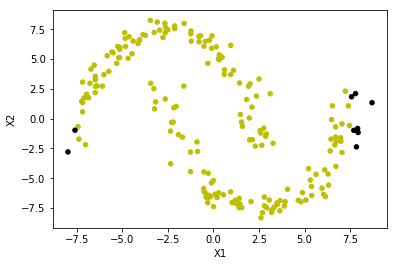

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(file3)

colors = np.where(df["observed_label"]==0,'y','k')
df.plot.scatter(x="X1",y="X2",c=colors)
plt.show()

In [172]:
unlabeled = df.loc[df['observed_label'] == 0]
#unlabeled

In [173]:
#labeled.columns

In [174]:
labeled = df.loc[df['observed_label'] != 0]
#labeled = pd.DataFrame(labeled)
labeledx = labeled[['X1', 'X2']]
labeledy = labeled['true_label']
unlabeledx = unlabeled[['X1', 'X2']]
unlabeledy = unlabeled['true_label']

## 2. KNN and Visualization ##

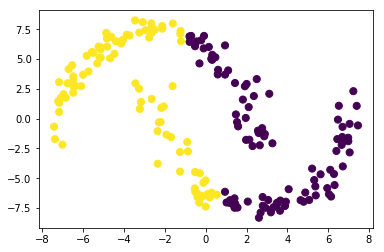

In [175]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(labeledx)
y_kmeans = kmeans.predict(unlabeledx)
plt.scatter(unlabeledx.X1, unlabeledx.X2, c=y_kmeans, s=50, cmap='viridis')
plt.show()

# K greater than 2 doesnt make sense because the data seems to be related by two parts.

## 3. Calculating the average Euclidean Distance ##

In [176]:
from sklearn.metrics import pairwise_distances
import statistics as stats
totaldatax = df[['X1','X2']]
dist_values = pairwise_distances(totaldatax, totaldatax)
dist_values
con_dist_values = np.array(dist_values)
sd = np.mean(con_dist_values)

## 4. Gaussian Radial Basis ##

In [177]:
import math
W = []

for x in range(0, dist_values.shape[0]):
    for y in range(0, dist_values.shape[1]):
        W.append(math.exp((dist_values[x,y])**2/(-2*sd)))
        
        


In [178]:
W2 = np.array(W).reshape(dist_values.shape[0],dist_values.shape[1])
#print(D2.shape)
np.fill_diagonal(W2, 0)
print(W2[0:5,0:5])

[[ 0.          0.73768188  0.03163958  0.78048493  0.53936404]
 [ 0.73768188  0.          0.02575906  0.99319187  0.16787571]
 [ 0.03163958  0.02575906  0.          0.03364941  0.01953379]
 [ 0.78048493  0.99319187  0.03364941  0.          0.19600164]
 [ 0.53936404  0.16787571  0.01953379  0.19600164  0.        ]]


## 5. Normalization Matrix and S Matrix

In [179]:
D = W2
col_sums = np.sum(D, axis=1)
np.fill_diagonal(D, col_sums)
#W3

Dinvsq = np.sqrt(np.abs(np.linalg.inv(D)))*(np.sign(D))

S = Dinvsq**(-1/2)*W2*Dinvsq**(-1/2)
D = W2
col_sums = np.sum(D, axis=1)
np.fill_diagonal(D, col_sums)
#W3

Dinvsq = np.sqrt(np.abs(np.linalg.inv(D)))*(np.sign(D))

S = Dinvsq**(-1/2)*W2*Dinvsq**(-1/2)
D = W2
col_sums = np.sum(D, axis=1)
np.fill_diagonal(D, col_sums)
#W3

Dinvsq = np.sqrt(np.abs(np.linalg.inv(D)))*(np.sign(D))

S = Dinvsq**(-1/2)*W2*Dinvsq**(-1/2)
print(S[0:5,0:5])

[[ 1534.74137919   118.0553929     36.71791866   125.04107243
    103.96572164]
 [  118.0553929   1170.37343351    51.51966075   125.15402722
     61.78797951]
 [   36.71791866    51.51966075   913.42413566    41.56824937
     28.04790838]
 [  125.04107243   125.15402722    41.56824937  1282.63380635    66.8662594 ]
 [  103.96572164    61.78797951    28.04790838    66.8662594   1200.53324593]]


In [180]:
#S.shape

In [181]:
##calcualting identity matrix
import numpy as np
I = np.identity(200, dtype = float)
print("Matrix Identity : \n", I)
I.shape

Matrix Identity : 
 [[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


(200, 200)

## 6. Function to Calc Predictions ##

In [182]:
def F(a, Y):
    val = np.dot(np.abs((I - a*S))**(-1/2)*np.sign(S),Y)
    return val

In [183]:
final = F(.85, totaldatay)
#totaldatay = df[['true_label']]
#print((np.abs((I - .85*S))**(-1/2)*np.sign(S))*totaldatay)
#S.shape
#I.shape
#totaldatay.shape

#z = (np.abs((I - .85*S))**(-1/2)*np.sign(S))
#final = np.dot(z,totaldatay)

## Scatterplot .85 ##

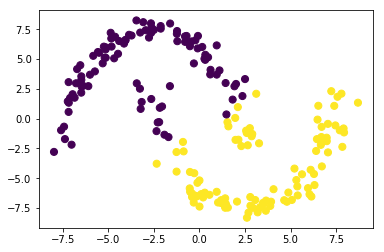

In [184]:
finalsign = np.sign(final)
finalsign2 = finalsign[:,0]
plt.scatter(totaldatax.X1, totaldatax.X2, c=finalsign2, s=50, cmap='viridis')
plt.show()

#finalsign2.shape

## Scatterplot .999 ##

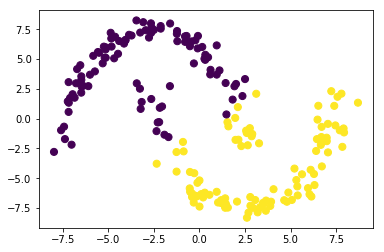

In [185]:
final = F(.99, totaldatay)
finalsign = np.sign(final)
finalsign2 = finalsign[:,0]
plt.scatter(totaldatax.X1, totaldatax.X2, c=finalsign2, s=50, cmap='viridis')
plt.show()